In [1]:
%matplotlib inline

# Linear Discriminant Analysis

Implementation of Linear Discriminant Analysis for dimensionality reduction

> from mlxtend.feature_extraction import LinearDiscriminantAnalysis

## Overview

Linear Discriminant Analysis (LDA) is most commonly used as dimensionality reduction technique in the pre-processing step for pattern-classification and machine learning applications.
The goal is to project a dataset onto a lower-dimensional space with good class-separability in order avoid overfitting ("curse of dimensionality") and also reduce computational costs.

Ronald A. Fisher formulated the *Linear Discriminant* in 1936 ([The Use of Multiple  Measurements in Taxonomic Problems](http://onlinelibrary.wiley.com/doi/10.1111/j.1469-1809.1936.tb02137.x/abstract)), and it also has some practical uses as classifier. The original Linear discriminant was described for a 2-class problem, and it was then later generalized as "multi-class Linear Discriminant Analysis" or "Multiple Discriminant Analysis" by C. R. Rao in 1948 ([The utilization of multiple measurements in problems of biological classification](http://www.jstor.org/stable/2983775))

**The general LDA approach is very similar to a Principal Component Analysis, but in addition to finding the component axes that maximize the variance of our data (PCA), we are additionally interested in the axes that maximize the separation between multiple classes (LDA).**

So, in a nutshell, often the goal of an LDA is to project a feature space (a dataset n-dimensional samples) onto a smaller subspace $k$ (where $k \leq n-1$) while maintaining the class-discriminatory information.   
In general, dimensionality reduction does not only help reducing computational costs for a given classification task, but it can also be helpful to avoid overfitting by minimizing the error in parameter estimation ("curse of dimensionality").

#### Summarizing the LDA approach in 5 steps


Listed below are the 5 general steps for performing a linear discriminant analysis.

1. Compute the $d$-dimensional mean vectors for the different classes from the dataset.
2. Compute the scatter matrices (in-between-class and within-class scatter matrix).
3. Compute the eigenvectors ($\mathbf{e_1}, \; \mathbf{e_2}, \; ..., \; \mathbf{e_d}$) and corresponding eigenvalues ($\mathbf{\lambda_1}, \; \mathbf{\lambda_2}, \; ..., \; \mathbf{\lambda_d}$) for the scatter matrices.
4. Sort the eigenvectors by decreasing eigenvalues and choose $k$ eigenvectors with the largest eigenvalues to form a $k \times d$ dimensional matrix $\mathbf{W}$ (where every column represents an eigenvector).
5. Use this $k \times d$ eigenvector matrix to transform the samples onto the new subspace. This can be summarized by the mathematical equation: $\mathbf{Y} = \mathbf{X} \times \mathbf{W}$ (where $\mathbf{X}$ is a $n \times d$-dimensional matrix representing the $n$ samples, and $\mathbf{y}$ are the transformed $n \times k$-dimensional samples in the new subspace).

### References

- Fisher, Ronald A. "[The use of multiple measurements in taxonomic problems.](http://onlinelibrary.wiley.com/doi/10.1111/j.1469-1809.1936.tb02137.x/abstract)" Annals of eugenics 7.2 (1936): 179-188.
- Rao, C. Radhakrishna. "[The utilization of multiple measurements in problems of biological classification.](http://www.jstor.org/stable/2983775)" Journal of the Royal Statistical Society. Series B (Methodological) 10.2 (1948): 159-203.

## Example 1 - LDA on Iris

In [2]:
from mlxtend.data import iris_data
from mlxtend.preprocessing import standardize
from mlxtend.feature_extraction import LinearDiscriminantAnalysis

X, y = iris_data()
X = standardize(X)

lda = LinearDiscriminantAnalysis(n_discriminants=2)
lda.fit(X, y)
X_lda = lda.transform(X)

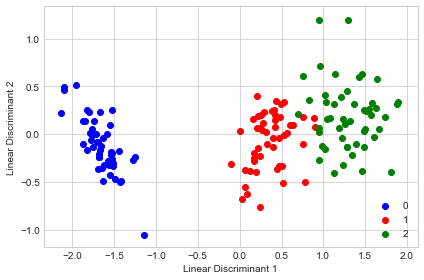

In [3]:
import matplotlib.pyplot as plt

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip((0, 1, 2),
                        ('blue', 'red', 'green')):
        plt.scatter(X_lda[y == lab, 0],
                    X_lda[y == lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Linear Discriminant 1')
    plt.ylabel('Linear Discriminant 2')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

## Example 2 - Plotting the Between-Class Variance Explained Ratio

In [4]:
from mlxtend.data import iris_data
from mlxtend.preprocessing import standardize
from mlxtend.feature_extraction import LinearDiscriminantAnalysis

X, y = iris_data()
X = standardize(X)

lda = LinearDiscriminantAnalysis(n_discriminants=2)
lda.fit(X, y)
X_lda = lda.transform(X)

In [5]:
import numpy as np

tot = sum(lda.e_vals_)
var_exp = [(i / tot)*100 for i in sorted(lda.e_vals_, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

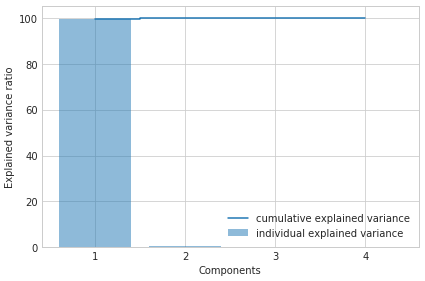

In [6]:
with plt.style.context('seaborn-whitegrid'):
    fig, ax = plt.subplots(figsize=(6, 4))
    plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(4), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Components')
    plt.xticks(range(4))
    ax.set_xticklabels(np.arange(1, X.shape[1] + 1))
    plt.legend(loc='best')
    plt.tight_layout()

In LDA, the number of linear discriminants is at most c−1, where c is the number of class labels, since the in-between scatter matrix SB is the sum of c matrices with rank 1 or less. We can indeed see that we only have two nonzero eigenvalues (the eigenvalues 2-4 are not exactly zero, but this is due to the  oating point arithmetic in NumPy).

## Example 3 - Factor Loadings

After evoking the `fit` method, the factor loadings are available via the `loadings_` attribute. In simple terms, the the loadings are the unstandardized values of the eigenvectors. Or in other words, we can interpret the loadings as the covariances (or correlation in case we standardized the input features) between the input features and the and the components (or eigenvectors), which have been scaled to unit length.

By having the loadings scaled, they become comparable by magnitude and we can assess how much variance in a component is attributed to the input features (as the components are  just a weighted linear combination of the input features).

In [7]:
from mlxtend.data import iris_data
from mlxtend.preprocessing import standardize
from mlxtend.feature_extraction import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

X, y = iris_data()
X = standardize(X)

lda = LinearDiscriminantAnalysis(n_discriminants=2)

lda.fit(X, y);

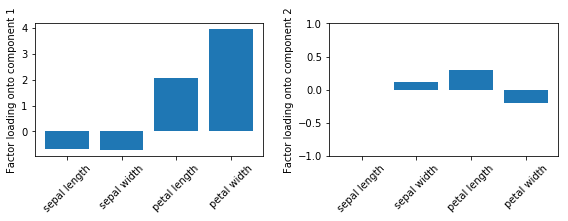

In [8]:
xlabels = ['sepal length', 'sepal width', 'petal length', 'petal width']

fig, ax = plt.subplots(1, 2, figsize=(8, 3))

ax[0].bar(range(4), lda.loadings_[:, 0], align='center')
ax[1].bar(range(4), lda.loadings_[:, 1], align='center')

ax[0].set_ylabel('Factor loading onto component 1')
ax[1].set_ylabel('Factor loading onto component 2')

ax[0].set_xticks(range(4))
ax[1].set_xticks(range(4))
ax[0].set_xticklabels(xlabels, rotation=45)
ax[1].set_xticklabels(xlabels, rotation=45)
plt.ylim([-1, 1])
plt.tight_layout()

## API

In [9]:
with open('../../api_modules/mlxtend.feature_extraction/LinearDiscriminantAnalysis.md', 'r') as f:
    s = f.read()
print(s)

## LinearDiscriminantAnalysis

*LinearDiscriminantAnalysis(n_discriminants=None)*

Linear Discriminant Analysis Class

**Parameters**

- `n_discriminants` : int (default: None)

    The number of discrimants for transformation.
    Keeps the original dimensions of the dataset if `None`.
    Note that the number of meaningful discriminants is
    is max. n_classes - 1. In other words,
    in LDA, the number of linear discriminants is at
    most c−1, where c is the number of class labels,
    since the in-between scatter matrix SB is
    the sum of c matrices with rank 1 or less.
    We can indeed see that we only have two nonzero eigenvalues

**Attributes**

- `w_` : array-like, shape=[n_features, n_discriminants]

    Projection matrix

- `e_vals_` : array-like, shape=[n_features]

    Eigenvalues in sorted order.

- `e_vecs_` : array-like, shape=[n_features]

    Eigenvectors in sorted order.

### Methods

<hr>

*fit(X, y, n_classes=None)*

Fit the LDA model with X.

**Parameters**

